# <span style="color:darkblue;">[LDATS2350] - DATA MINING</span>

### <span style="color:darkred;">Python09 - # Comparing Distributions</span>

**Prof. Robin Van Oirbeek**  

<br/>

**<span style="color:darkgreen;">Guillaume Deside</span>** (<span style="color:gray;">guillaume.deside@uclouvain.be</span>)

---

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
#The breast cancer dataset is a classic and very easy binary classification dataset.
dataset = load_breast_cancer() 

#create the dataframe
df = pd.DataFrame(dataset.data)
columns = dataset.feature_names
df.columns = columns
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise - Scaling and Visualizing a Feature Distribution**

#### **Objective**
Learn how to:
- **Visualize the distribution of a feature** using a histogram.
- **Compute basic statistics** of a feature.
- **Apply standardization (Z-score normalization)** using `StandardScaler` from `sklearn`.
- **Compare the original and scaled distributions**.

---

#### **Instructions**

1. **Extract a Feature for Analysis**:
   - Select the column **`'mean radius'`** from `df`.

2. **Visualize the Original Distribution**:
   - Use `plt.hist()` to plot the histogram of the feature.

3. **Compute Summary Statistics**:
   - Use `.describe()` to obtain **mean, min, max, standard deviation** of the feature.

4. **Apply Standard Scaling**:
   - Use `StandardScaler()` to **normalize** the feature so that it has **mean = 0** and **variance = 1**.

5. **Visualize the Scaled Distribution**:
   - Plot the histogram of the **scaled feature** and compare it to the original.


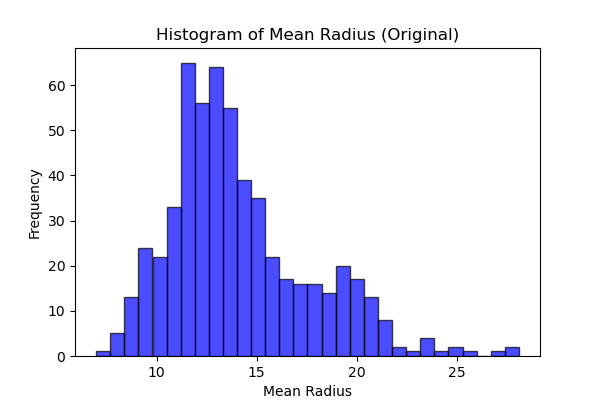

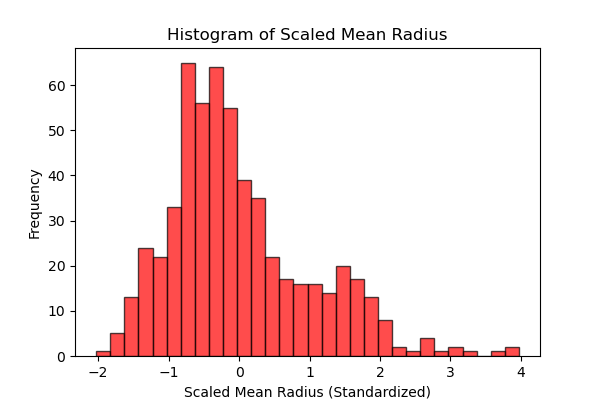

# Test 1. Uniform distribution

The goal of this code is to **fit a probability distribution** to a dataset (in this case, the standardized feature `mr_scaled`) and generate a **random sample** that follows the same distribution. This is useful in **statistical analysis, anomaly detection, and data simulation**.


(-2.0296483039857525, 6.000935950530862)


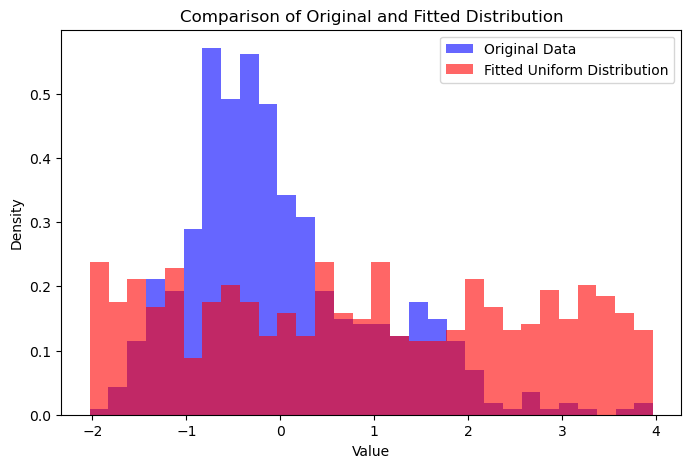

In [22]:
###Selecting a Probability Distribution**

dist = getattr(scipy.stats, 'uniform')
###  Fitting the Distribution to Data ###
param = dist.fit(mr_scaled)
print(param)

### Generating a Sample from the Fitted Distribution ###
sampled_theo_dist = dist.rvs(*param[0:-2], loc=param[-2], scale=param[-1], size=len(mr_scaled))

plt.figure(figsize=(8,5))
plt.hist(mr_scaled, bins=30, alpha=0.6, color='blue', label="Original Data", density=True)
plt.hist(sampled_theo_dist, bins=30, alpha=0.6, color='red', label="Fitted Uniform Distribution", density=True)
plt.legend()
plt.title("Comparison of Original and Fitted Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def compare_dist(dist_1, dist_2):
    """
    Compare two probability distributions using a QQ-plot and histograms.
    
    This function performs a Quantile-Quantile (QQ) plot to visually assess 
    how well two distributions match. It also plots histograms of both distributions 
    for further comparison.

    Parameters:
    -----------
    dist_1 : array-like
        The first dataset (e.g., empirical data or a fitted distribution).
    dist_2 : array-like
        The second dataset (e.g., another empirical dataset or generated sample from a fitted distribution).

    Functionality:
    --------------
    1. Sorts `dist_1` to ensure order for quantile comparison.
    2. Computes **percentiles (quantiles)** for both distributions.
    3. Generates a **QQ-plot**:
       - Plots quantiles of `dist_1` against `dist_2`.
       - Includes a reference **y = x** dashed line to indicate perfect alignment.
    4. Plots **overlapping histograms** of both distributions to compare their shapes.

    Returns:
    --------
    None (Displays two plots: QQ-plot and histogram comparison).

    Example Usage:
    --------------
    ```python
    import scipy.stats as stats
    
    # Generate two distributions
    sample_1 = np.random.normal(loc=0, scale=1, size=1000)  # Normal Distribution
    sample_2 = np.random.uniform(low=-2, high=2, size=1000)  # Uniform Distribution
    
    # Compare the distributions
    compare_dist(sample_1, sample_2)
    ```

    """
    # Step 1: Sort the first distribution
    dist_1.sort()

    # Step 2: Compute percentiles for both distributions
    percs = np.linspace(0, 100, 21)  # 21 evenly spaced percentiles from 0% to 100%
    q_a = np.percentile(dist_1, percs)  # Quantiles of dist_1
    q_b = np.percentile(dist_2, percs)  # Quantiles of dist_2

    # Step 3: Generate the QQ-plot
    plt.figure(figsize=(6, 6))
    plt.plot(q_a, q_b, ls="", marker="o", label="Quantiles")
    plt.plot(q_a, q_a, color="k", ls="--", label="y = x Reference Line")  # Ideal fit line
    plt.title("QQ-Plot (Quantile-Quantile Comparison)")
    plt.xlabel("Quantiles of dist_1")
    plt.ylabel("Quantiles of dist_2")
    plt.legend()
    plt.show()

    # Step 4: Generate the Histogram Comparison
    plt.figure(figsize=(8, 5))
    plt.hist(dist_1, bins=30, alpha=0.5, density=True, color='orange', label="Distribution 1")
    plt.hist(dist_2, bins=30, alpha=0.5, density=True, color='blue', label="Distribution 2")
    plt.title("Histogram Comparison of Distributions")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

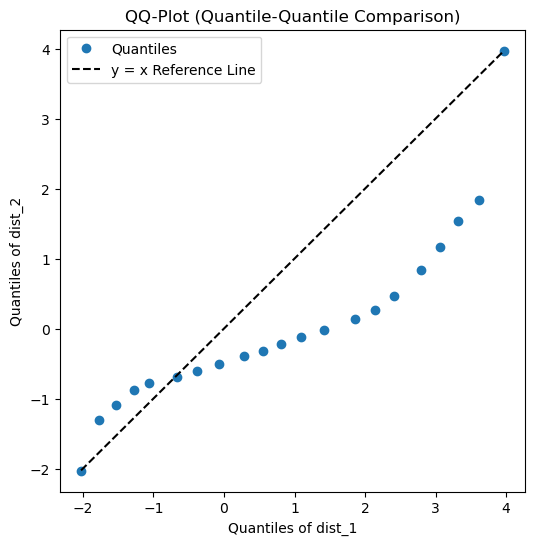

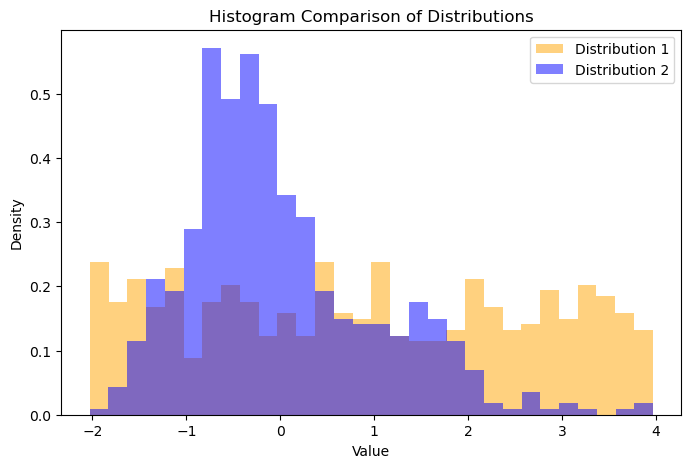

In [26]:
compare_dist(sampled_theo_dist,mr_scaled)

# Test Exponential and Normal distribution

<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise - Fitting and Comparing Exponential and Normal Distributions**

#### **Objective**
- Learn how to **fit two different distributions (exponential and normal) to a dataset**.
- Use `scipy.stats.expon.fit()` and `scipy.stats.norm.fit()` to estimate distribution parameters.
- Generate **random samples** from the fitted distributions.
- Compare the **empirical data (`mr_scaled`)** with the **exponential and normal distributions** using:
  - **QQ-plot**
  - **Histogram comparison**

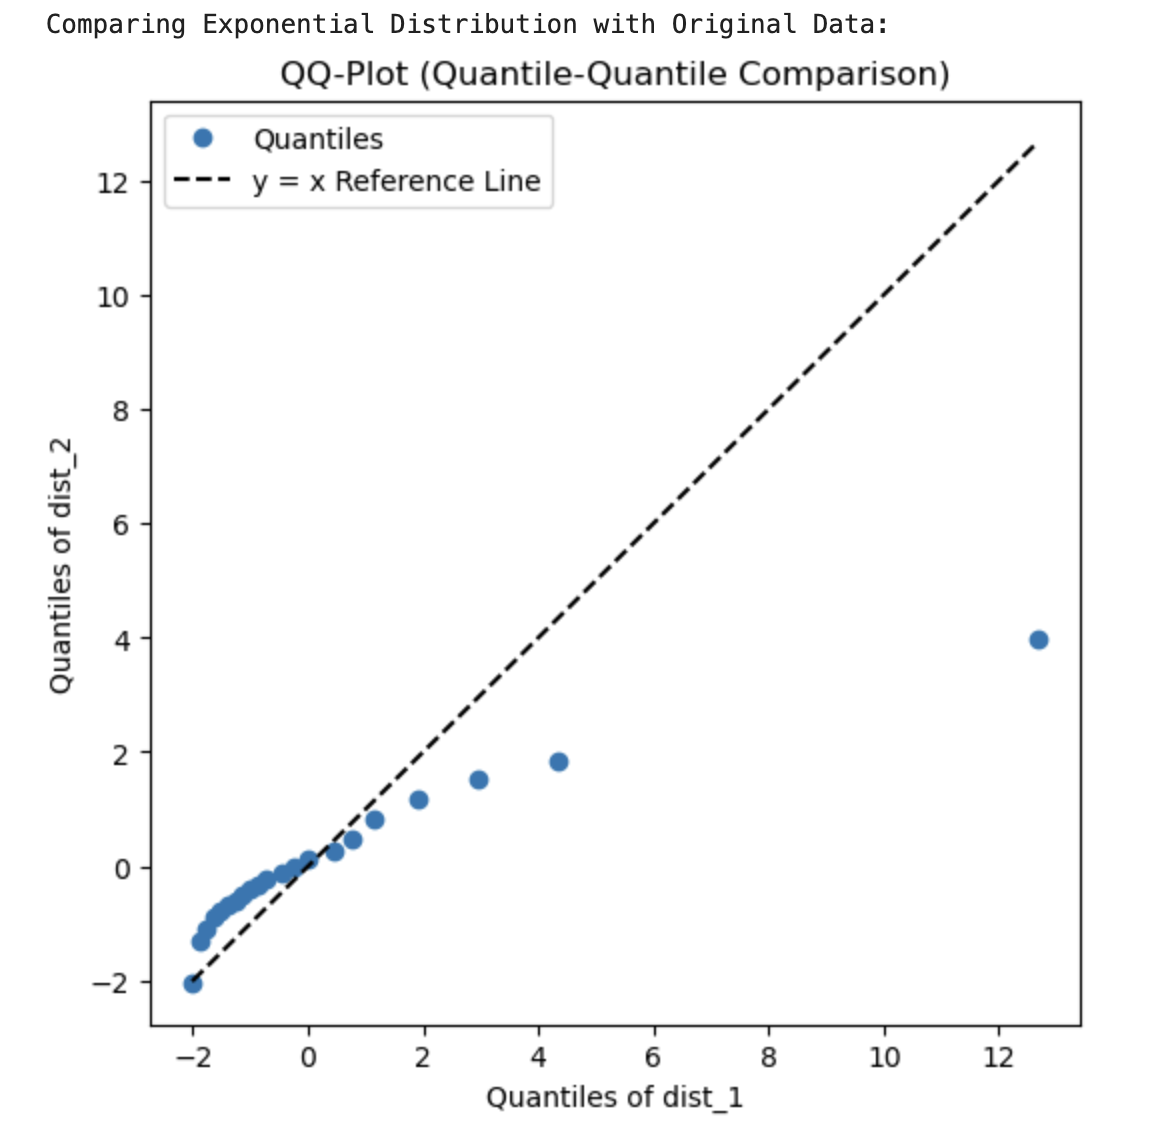

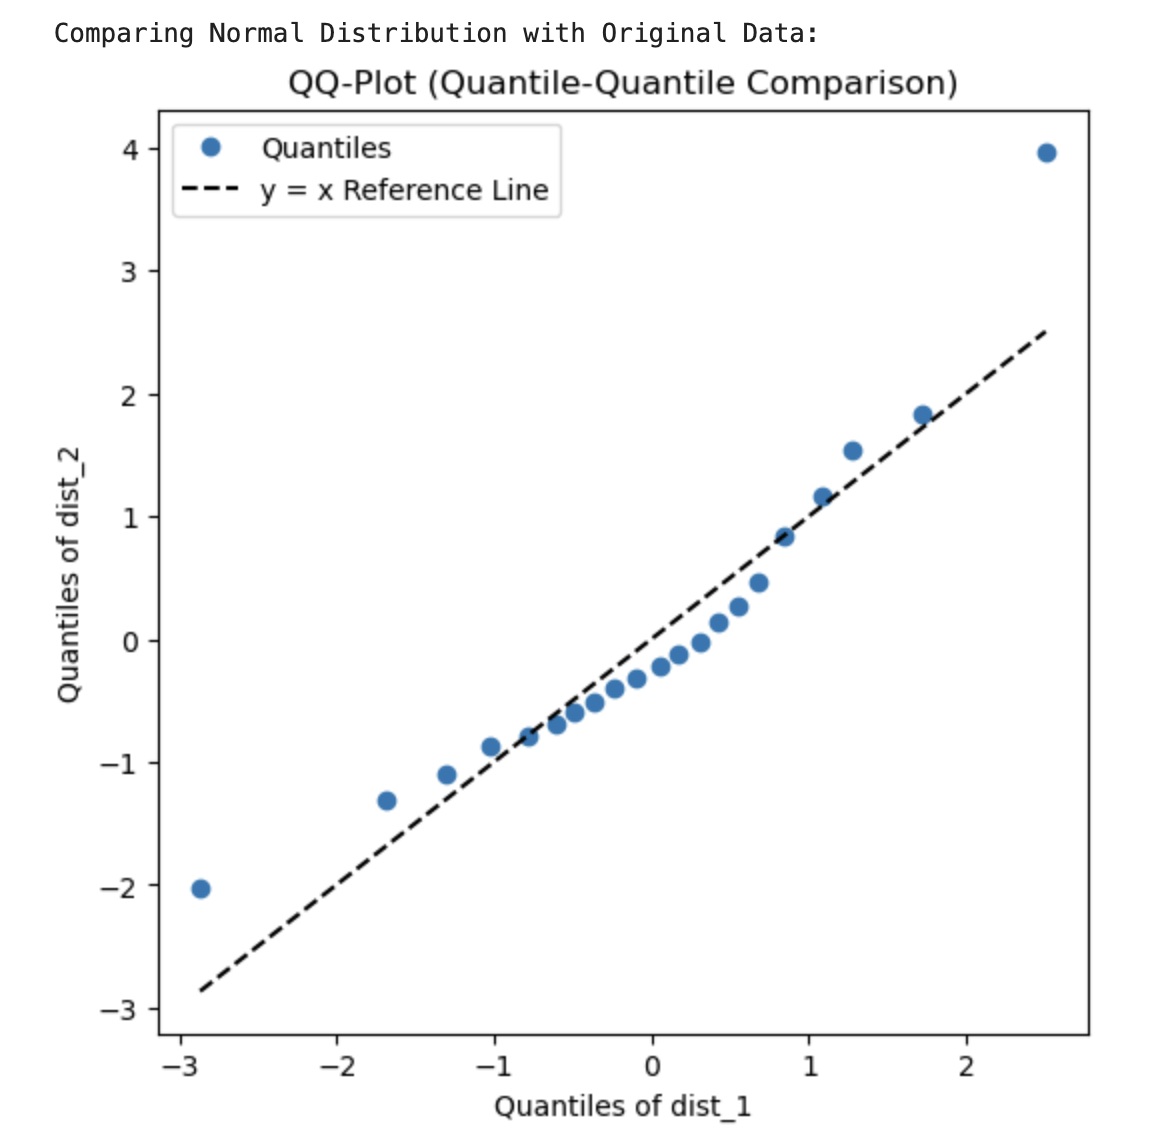

## Hypothesis test



### **Goal of This Code**
The goal of this code is to **test whether a dataset (`mr_scaled`) follows a normal distribution** using three different statistical normality tests from the `scipy.stats` module:
1. **D’Agostino-Pearson’s Test (`normaltest`)**
2. **Shapiro-Wilk Test (`shapiro`)**
3. **Kolmogorov-Smirnov (K-S) Test (`kstest`)**

These tests help determine whether a dataset is **normally distributed**, which is crucial for many machine learning algorithms and statistical analyses.


In [41]:
from scipy import stats

# D'agostino normality test
print(stats.normaltest(mr_scaled))
# Shapiro test of normality
print(stats.shapiro(mr_scaled))

NormaltestResult(statistic=73.17938185797064, pvalue=1.2861722495064165e-16)
ShapiroResult(statistic=0.9410690724099643, pvalue=3.105643573333344e-14)




#### **D’Agostino and Pearson’s Test**
This test checks for **skewness and kurtosis** to assess normality.

##### **Returns:**
- **Test Statistic**: Measures deviation from normality.
- **p-value**: If **p < 0.05**, the null hypothesis (data is normally distributed) is rejected.
- **Best for large datasets** (**n > 20**).

##### **Interpretation:**
- If **p-value > 0.05** → Fail to reject normality assumption.
- If **p-value < 0.05** → Data is **not normally distributed**.

---

#### **Shapiro-Wilk Test**
The **Shapiro-Wilk test** assesses normality by checking how well data fits a normal distribution.

##### **Returns:**
- **Test Statistic** (**closer to 1 means more normal**).
- **p-value** (**same interpretation as `normaltest`**).
- **More accurate for small datasets** (**n < 50**).
- **Less powerful for large datasets**.


In [45]:
# Kolmogorov-Smirnov Test
print(stats.kstest(mr_scaled, "norm"))
print(stats.kstest(mr_scaled, norm_sample))
# normality tests use a (0,1) normal distribution 

KstestResult(statistic=0.11273020428287472, pvalue=9.379762733102699e-07, statistic_location=-0.06455408079851989, statistic_sign=1)
KstestResult(statistic=0.15641476274165203, pvalue=1.7208092250148244e-06, statistic_location=-0.07307450668313027, statistic_sign=1)


#### **Kolmogorov-Smirnov (K-S) Test**

The **K-S test** compares the dataset against a given **theoretical distribution** to determine how well it follows that distribution.

##### **Returns:**
- **D-statistic**: Maximum difference between the **cumulative distribution functions (CDFs)** of the sample and the theoretical distribution.
- **p-value**: Measures the **significance of the deviation** from the theoretical distribution.

##### **Interpretation:**
- If **p-value > 0.05** → The dataset **follows** the normal distribution.
- If **p-value < 0.05** → The dataset **significantly deviates** from normality.


# Test The Gamma distribution 

<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise - Fitting and Testing a Gamma Distribution**

#### **Objective**
- Learn how to **fit a Gamma distribution** to a dataset.
- Use `scipy.stats.gamma.fit()` to estimate the **shape, location, and scale parameters**.
- Generate a **random sample** from the fitted Gamma distribution.
- Compare the empirical data (`mr_scaled`) with the fitted Gamma distribution using:
  - **QQ-plot and Histogram**
  - **Kolmogorov-Smirnov (K-S) test** for statistical comparison.


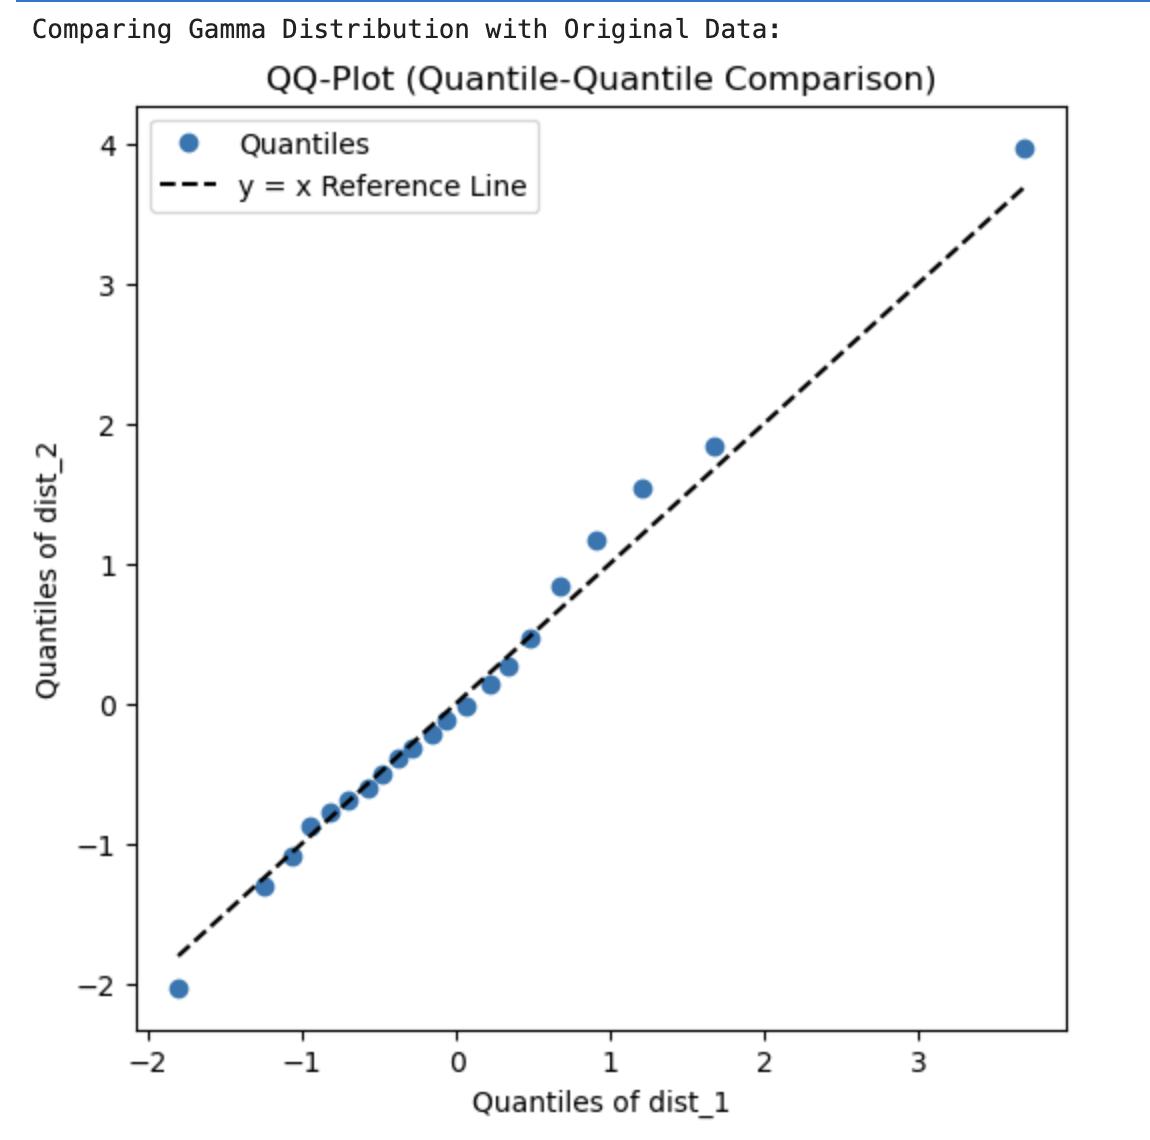